In [1]:
import requests
import pandas as pd
from pandas.io.json import json_normalize
import re

# Leyendo csv de los datos historicos

In [2]:
# precio de etherium por dia desde el 24 de dic de 2016 hasta el 24 de enero de 2020
csv = pd.read_csv('Ethereum Historical Data - Investing.com.csv')
csv['Date'] = pd.to_datetime(csv['Date'], infer_datetime_format=True)
csv_df = csv.sort_values(by='Date').reset_index()
csv_df.tail(5)

,index,Date,Price,Open,High,Low,Vol.,Change %
1122,4,2020-01-20,166.87,166.92,169.24,161.61,11.30M,-0.03%
1123,3,2020-01-21,169.41,166.87,169.79,165.53,11.52M,1.52%
1124,2,2020-01-22,168.13,169.41,171.27,166.19,11.30M,-0.76%
1125,1,2020-01-23,162.80,168.15,168.25,159.78,14.86M,-3.17%
1126,0,2020-01-24,163.08,162.80,164.27,155.65,15.33M,0.18%


# request de la api de cryptocompare

In [3]:
# ultimas 1000 transacciones registradas en el mercado de etherium por dia, todos los precios son en usd
response = requests.get('https://min-api.cryptocompare.com/data/v2/histoday?fsym=ETH&tsym=USD&limit=1126')
read = response.json()
high = []
low = []
open=[]
close = []
for i in read['Data']['Data']:
    high.append(i['high'])
    low.append(i['low'])
    open.append(i['open'])
    close.append(i['close'])

In [4]:
df = pd.DataFrame()
df['Open'] = open
df['High'] = high
df['Low'] = low
df['Close'] = close
df.tail(5)

,Open,High,Low,Close
1122,166.64,171.09,166.56,169.09
1123,169.09,170.22,165.28,167.97
1124,167.97,164.02,160.41,162.51
1125,162.51,163.75,158.77,162.40
1126,162.45,162.47,157.64,159.94


# csv yahoo finances

In [5]:
yah = pd.read_csv('ETH-USD.csv')
yah['Date'] = pd.to_datetime(yah['Date'], infer_datetime_format=True)
yah.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
1122,2020-01-20,166.904129,169.114883,162.331604,167.120514,167.120514,11144529787
1123,2020-01-21,167.060471,169.910110,165.819717,169.697159,169.697159,9789369362
1124,2020-01-22,169.608536,171.008698,166.774231,168.294159,168.294159,9209827927
1125,2020-01-23,168.295700,168.312241,160.295319,162.928558,162.928558,10396868698
1126,2020-01-24,162.950241,164.293701,156.750778,163.630173,163.630173,10699618304


In [6]:
data = csv_df.join(df['Close'])
final = data.join(yah[['Adj Close', 'Volume']])
final2 = final.drop('index', axis=1)
final3 = final2[['Date','Price','Open','High','Low','Close','Adj Close','Vol.','Volume','Change %']]

final3.dtypes

Date         datetime64[ns]
Price                object
Open                 object
High                 object
Low                  object
Close               float64
Adj Close           float64
Vol.                 object
Volume                int64
Change %             object
dtype: object

In [7]:
final3['Price'] = final3['Price'].str.replace(',','')
final3['Open']=final3['Open'].str.replace(',','')
final3['High']=final3['High'].str.replace(',','')
final3['Low']=final3['Low'].str.replace(',','')

In [8]:
final3 = final3.astype({'Price':'float64'})
final3 = final3.astype({'Open':'float64'})
final3 = final3.astype({'High':'float64'})
final3 = final3.astype({'Low':'float64'})
final3.dtypes

Date         datetime64[ns]
Price               float64
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Vol.                 object
Volume                int64
Change %             object
dtype: object

In [9]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

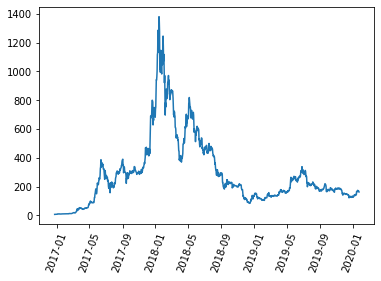

In [23]:
degrees = 70
date = final3['Date']
ope = final3['Open']
plt.xticks(rotation=degrees)
plt.plot(date, ope)

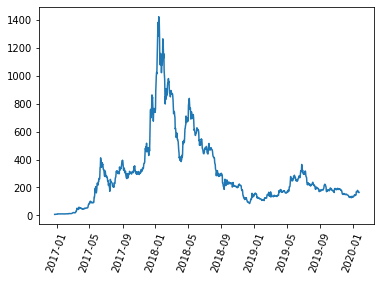

In [11]:
hig = final3['High']
plt.xticks(rotation=degrees)
plt.plot(date,hig)

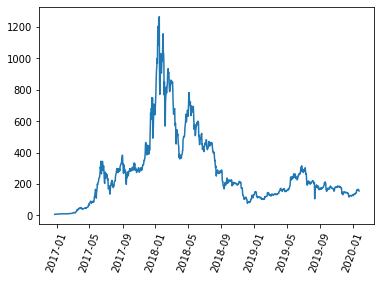

In [12]:
lo = final3['Low']
plt.xticks(rotation=degrees)
plt.plot(date,lo)

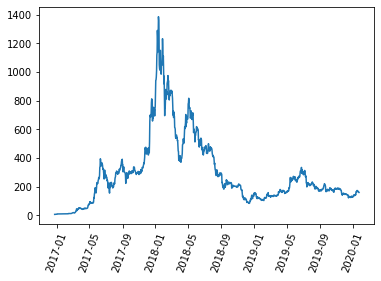

In [17]:
clo = final3['Close']
plt.xticks(rotation=degrees)
plt.plot(date,clo)
plt.show()

In [14]:
final3['Mediana'] = (final3['Open']-final3['Close'])/2
final3

,Date,Price,Open,High,Low,Close,Adj Close,Vol.,Volume,Change %,Mediana
0,2016-12-24,7.25,7.11,7.35,7.11,7.164,7.265770,56.77K,7626020,1.26%,-0.0270
1,2016-12-25,7.23,7.25,7.32,7.17,7.212,7.175080,16.44K,8671840,-0.28%,0.0190
2,2016-12-26,7.27,7.11,7.35,7.05,7.142,7.274090,78.87K,5836810,0.55%,-0.0160
3,2016-12-27,7.12,7.27,7.33,7.08,7.465,7.170820,40.80K,8778610,-2.06%,-0.0975
4,2016-12-28,7.58,7.20,7.76,7.10,8.214,7.520110,177.26K,17453300,6.46%,-0.5070
...,...,...,...,...,...,...,...,...,...,...,...
1122,2020-01-20,166.87,166.92,169.24,161.61,169.090,167.120514,11.30M,11144529787,-0.03%,-1.0850
1123,2020-01-21,169.41,166.87,169.79,165.53,167.970,169.697159,11.52M,9789369362,1.52%,-0.5500
1124,2020-01-22,168.13,169.41,171.27,166.19,162.510,168.294159,11.30M,9209827927,-0.76%,3.4500
1125,2020-01-23,162.80,168.15,168.25,159.78,162.400,162.928558,14.86M,10396868698,-3.17%,2.8750
